In [134]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# read csv file, source of data: Robert Koch Institut

df = pd.read_csv('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv')

In [133]:
df.head()

FID  IdBundesland          Bundesland     Landkreis Altersgruppe  \
0  8814037             1  Schleswig-Holstein  SK Flensburg      A15-A34   
1  8814038             1  Schleswig-Holstein  SK Flensburg      A15-A34   
2  8814039             1  Schleswig-Holstein  SK Flensburg      A15-A34   
3  8814040             1  Schleswig-Holstein  SK Flensburg      A15-A34   
4  8814041             1  Schleswig-Holstein  SK Flensburg      A15-A34   

  Geschlecht  AnzahlFall  AnzahlTodesfall Meldedatum  IdLandkreis  \
0          M           1                0 2020-03-14         1001   
1          M           1                0 2020-03-19         1001   
2          M           1                0 2020-03-19         1001   
3          M           1                0 2020-03-21         1001   
4          M           1                0 2020-03-27         1001   

              Datenstand  NeuerFall  NeuerTodesfall             Refdatum  \
0  25.05.2020, 00:00 Uhr          0              -9  2020/03/16 00:00:00   
1  25.05.2020, 00:00 Uhr          0              -9  2020/03/13 00:00:00   
2  25.05.2020, 00:00 Uhr          0              -9  2020/03/16 00:00:00   
3  25.05.2020, 00:00 Uhr          0              -9  2020/03/13 00:00:00   
4  25.05.2020, 00:00 Uhr          0              -9  2020/03/22 00:00:00   

   NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn      Altersgruppe2  
0           0              1                     1  Nicht übermittelt  
1           0              1                     1  Nicht übermittelt  
2           0              1                     1  Nicht übermittelt  
3           0              1                     1  Nicht übermittelt  
4           0              1                     1  Nicht übermittelt

In [51]:
# get list of Germany's Federal States

districts = list(df['Bundesland'].unique())

In [52]:
districts

['Schleswig-Holstein',
 'Hamburg',
 'Niedersachsen',
 'Bremen',
 'Nordrhein-Westfalen',
 'Hessen',
 'Rheinland-Pfalz',
 'Baden-Württemberg',
 'Bayern',
 'Saarland',
 'Berlin',
 'Brandenburg',
 'Mecklenburg-Vorpommern',
 'Sachsen',
 'Sachsen-Anhalt',
 'Thüringen']

In [53]:
# transform 'Meldetatum' column to datatime object

df['Meldedatum'] = pd.to_datetime(df['Meldedatum'].str[:10], yearfirst=True)

In [129]:
# create DataFrame of cases per district

cases_per_district = df.groupby(['Bundesland', 'Meldedatum'])[['Bundesland', 'AnzahlFall']].sum()

In [130]:
cases_per_district.reset_index(inplace=True)

In [131]:
cases_per_district.sample(5)

Bundesland Meldedatum  AnzahlFall
317           Brandenburg 2020-04-19          28
965              Saarland 2020-04-10          91
772   Nordrhein-Westfalen 2020-03-09          97
381                Bremen 2020-04-06           5
1038              Sachsen 2020-04-05          69

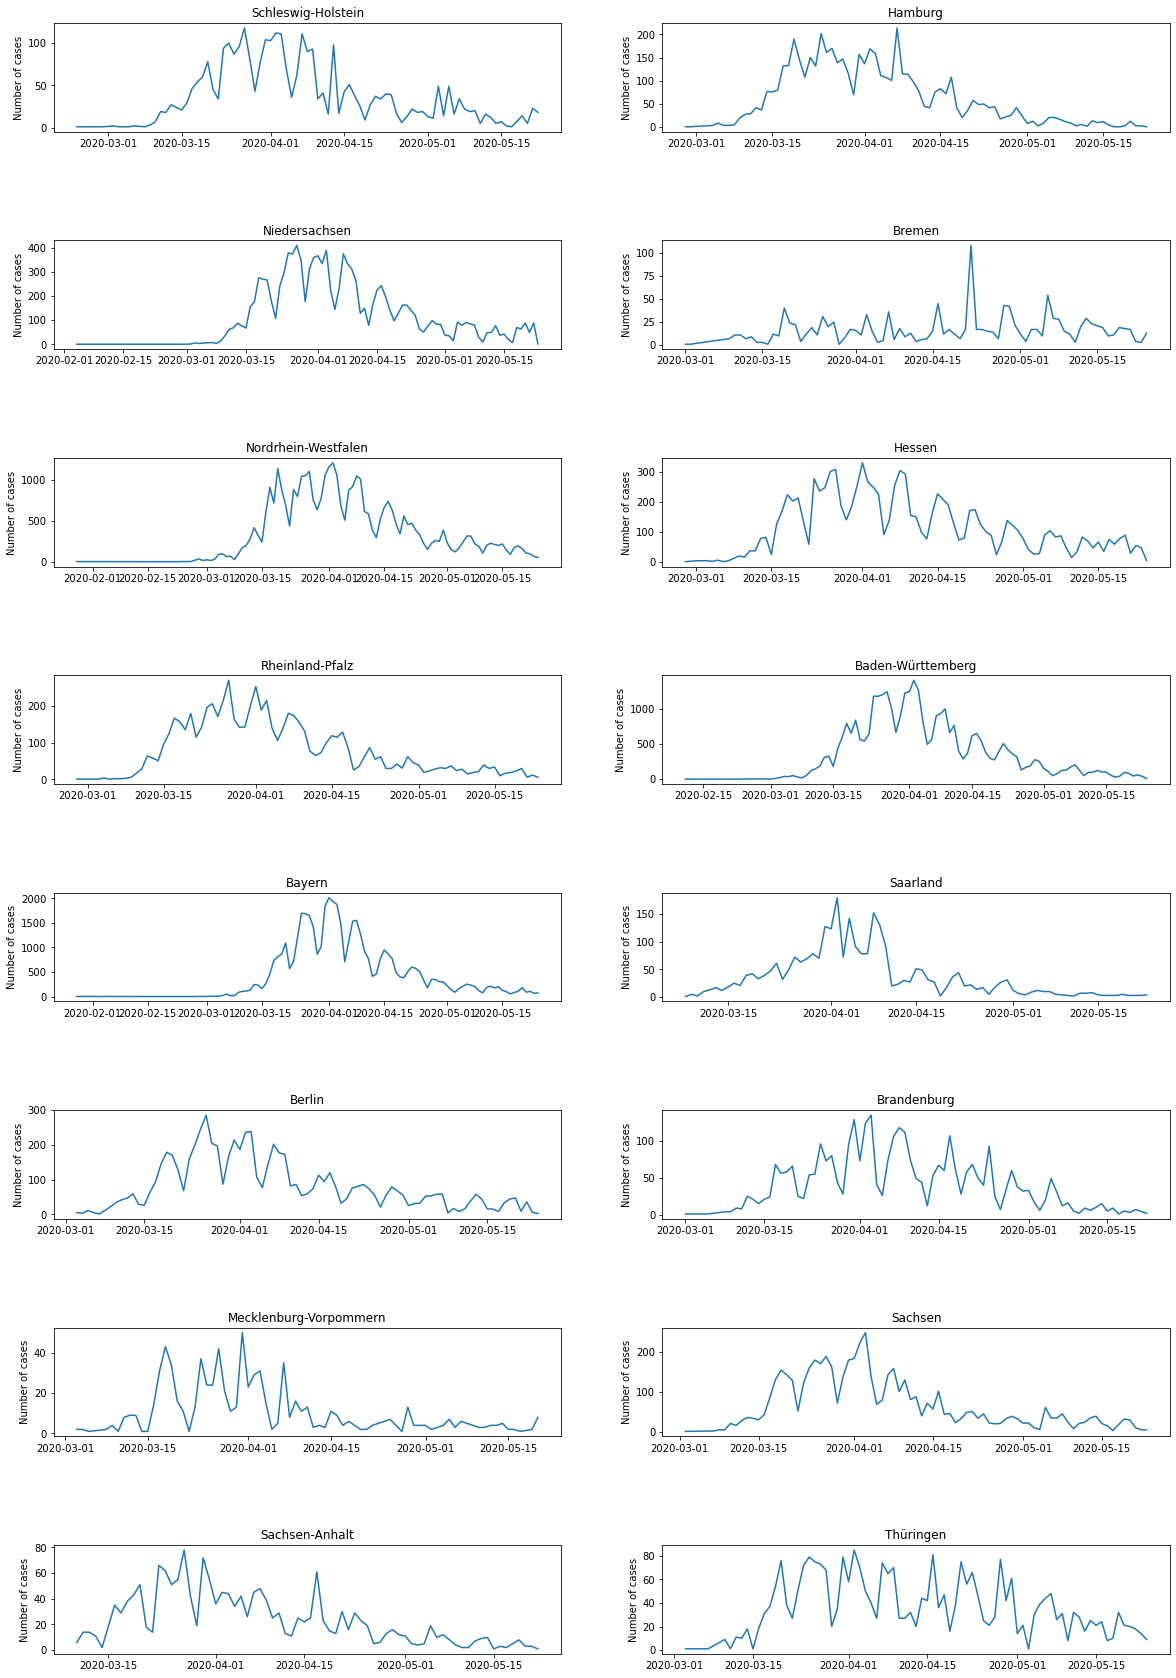

In [125]:
# plot the cases/dates graph for every Federal State
p=1
fig = plt.figure(figsize=(20, 30))
for district in districts:
    
    
    plt.subplot(8, 2, p)
    plt.subplots_adjust(hspace = 1)
    plt.plot(cases_per_district[cases_per_district['Bundesland']==district]['Meldedatum'], cases_per_district[cases_per_district['Bundesland']==district]['AnzahlFall'])
    
    plt.ylabel("Number of cases");
    plt.title(district)
    p += 1
    
# save figures on .png file
#   plt.savefig(district)

In [10]:
# save DataFrame to csv file

cases_per_district.to_csv('cases_per_district.csv')

In [11]:
# sum of cases per district

sum_cases_per_district = df.groupby(['Bundesland'])[['Bundesland','AnzahlFall']].sum()

sum_cases_per_district.reset_index(inplace=True)

print(sum_cases_per_district)

                Bundesland  AnzahlFall
0        Baden-Württemberg       34390
1                   Bayern       46202
2                   Berlin        6636
3              Brandenburg        3214
4                   Bremen        1299
5                  Hamburg        5065
6                   Hessen        9761
7   Mecklenburg-Vorpommern         757
8            Niedersachsen       11578
9      Nordrhein-Westfalen       37220
10         Rheinland-Pfalz        6590
11                Saarland        2712
12                 Sachsen        5221
13          Sachsen-Anhalt        1694
14      Schleswig-Holstein        3062
15               Thüringen        2857


In [12]:
import folium

In [59]:
# plot choropleth map using folium library

m = folium.Map(location=[51, 10], zoom_start=5)

In [60]:
m.choropleth(
 geo_data='https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/master/2_bundeslaender/1_sehr_hoch.geo.json',
 name='choropleth',
 columns=['Bundesland', 'AnzahlFall'],
 data=sum_cases_per_district,
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.5,
 legend_name='Number of cases'
)

In [66]:
m

In [64]:
# save choropleth as html page

m.save("cases_per_district_map.html")